# Least-Squares Classifier

- $y(x) = \tilde{W}^T\tilde{X}$

- $E_D(\tilde{w}) = \frac{1}{2} \mathrm{Tr}\{(\tilde{W}^T\tilde{X} - T)^T(\tilde{W}^T\tilde{X} - T)\}$.
- $\tilde{W} = (X^TX)^{-1}X^TT = X^{+}T$


Where the target $T$ in encoded using the 1-of-k coding scheme, and has shape of $N x K$.<br>
$T =
\begin{bmatrix} 
t_1^T & ... & t_N^T \\
\end{bmatrix}^T$, $t_n$ is a vector with all zeros value,except for the class index.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from utils import plot_DB, plot_DR
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=100, centers=5, n_features=2, cluster_std=2, random_state=20)

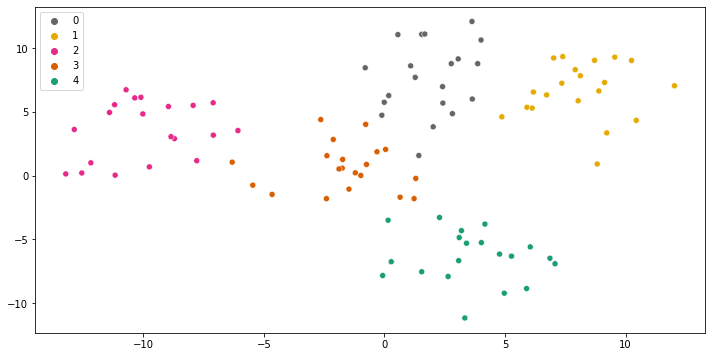

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Dark2_r');

### Least Squares Classifier

In [4]:
class Least_Squares:
    
    def __init__(self, basis=None, scale=True, degree=None, b_mu=None, b_s=None):
        self.basis = basis
        self.scale = scale
        self.degree = degree
        self.b_mu = b_mu
        self.b_s = b_s

    def one_of_K_coding(self, y):
        ys = len(np.unique(y))
        N = len(y)
        y_encoded = np.zeros((N, ys))
        for i in range(N):
            y_encoded[i][y[i]] = 1
        return y_encoded
    
    def _scale_fit(self, X, L=-1, H=1):
        P = X.shape[1]
        self.a = []; self.b = []
        for p in range(P):
            self.a.append(((H * min(X[:, p])) - (L * max(X[:, p])))/(H-L))
            self.b.append((max(X[:, p]) - min(X[:, p]))/(H - L))

    def _scale_transform(self, X):
        X_scaled = (X - self.a)/self.b
        return X_scaled.reshape(X.shape[0], -1)
    
    def _scale_inverse(X):
        return (X * self.b) + self.a
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        
        if self.scale:
            self._scale_fit(X)
            X = self._scale_transform(X)
        
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        
        y = y.reshape(-1, 1)
        self.y = self.one_of_K_coding(y)
        
        self.W = np.linalg.pinv(X).dot( self.y)

    def predict(self, X:np.ndarray):
        if self.scale:
            X = self._scale_transform(X)
        X = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        return np.argmax(X.dot(self.W), axis=-1)

In [5]:
model = Least_Squares()
model.fit(X, y)

In [6]:
acc = str(100*sum(model.predict(X)==y)/len(y))+'%'
print('Accuracy: {}'.format(acc))

Accuracy: 69.0%


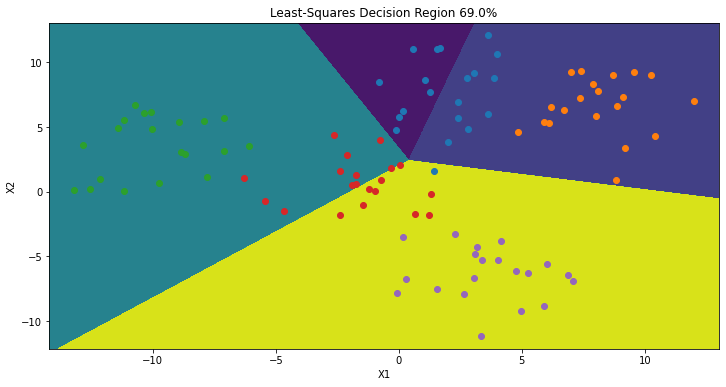

In [7]:
plot_DR(X, y, model, 'Least-Squares Decision Region {}'.format(acc))

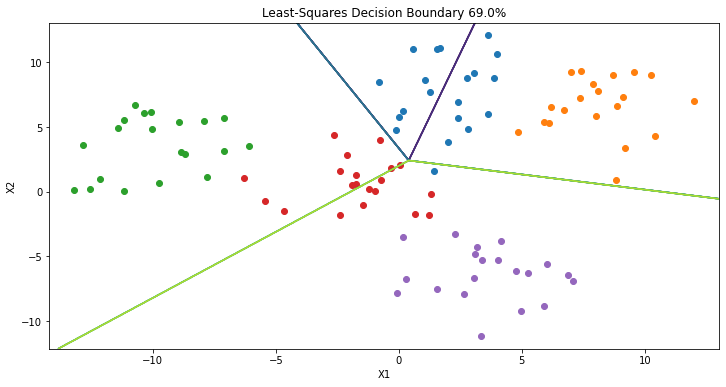

In [8]:
plot_DB(X, y, model, 'Least-Squares Decision Boundary {}'.format(acc))

> #### The 1-of-k coding scheme for 6 classes

In [9]:
model.one_of_K_coding([0, 1, 1, 5, 4, 2, 3, 0])

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])